In [145]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [147]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [148]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [149]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [150]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [151]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

In [152]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [153]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [154]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [155]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [156]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [157]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

In [158]:
data.shape

(319795, 18)

In [159]:
#70% train, 30% test

319795 * 0.7

223856.5

In [160]:
train = data.iloc[:223856, :]
test = data.iloc[223856:, :]

<AxesSubplot:>

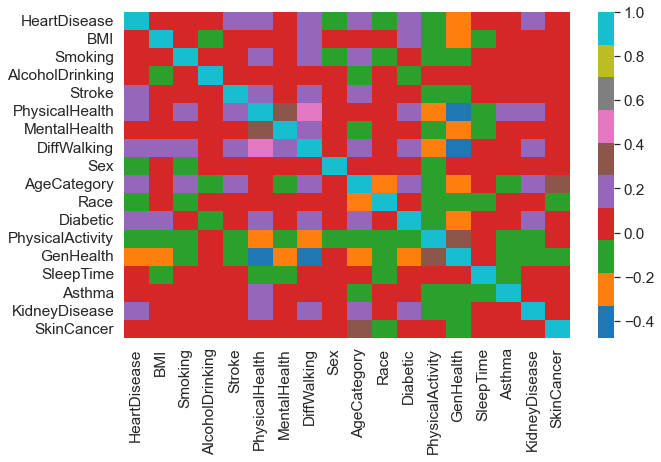

In [161]:
sns.heatmap(train.corr(), cmap='tab10')

In [162]:
train.corr().loc["HeartDisease", :]

HeartDisease        1.000000
BMI                 0.051816
Smoking             0.108089
AlcoholDrinking    -0.030670
Stroke              0.196633
PhysicalHealth      0.167607
MentalHealth        0.027049
DiffWalking         0.201167
Sex                -0.070926
AgeCategory         0.233795
Race               -0.040265
Diabetic            0.177459
PhysicalActivity   -0.099053
GenHealth          -0.243695
SleepTime           0.012958
Asthma              0.040076
KidneyDisease       0.145019
SkinCancer          0.094440
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

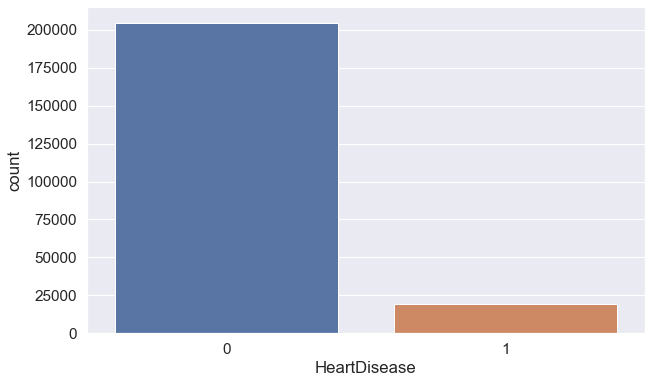

In [163]:
sns.countplot(x='HeartDisease',data=train)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

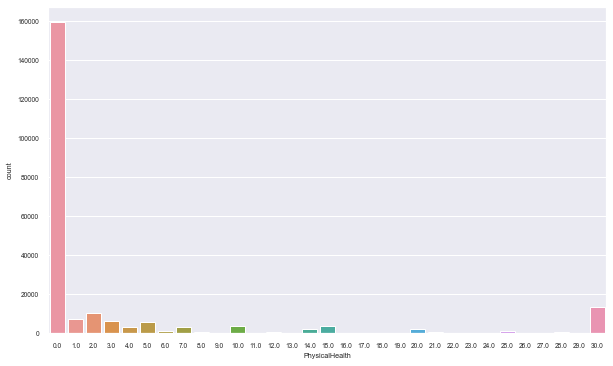

In [164]:
sns.set(font_scale = 0.6)
sns.countplot(x='PhysicalHealth',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

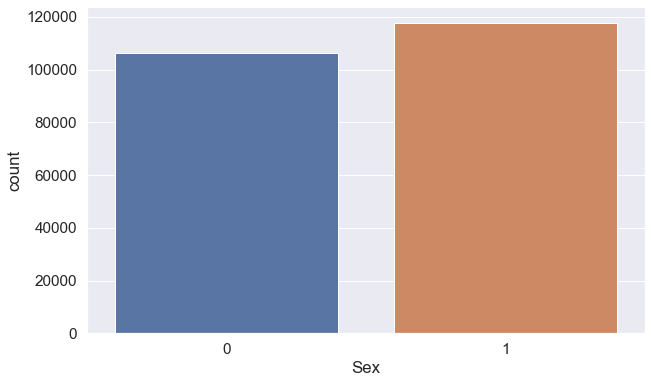

In [165]:
sns.set(font_scale = 1.4)
sns.countplot(x='Sex',data=train)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

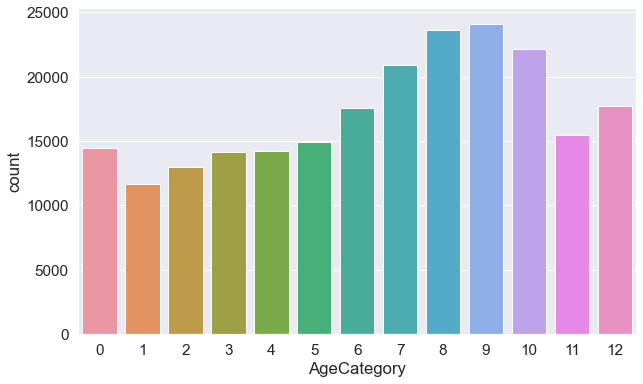

In [166]:
sns.countplot(x='AgeCategory',data=train)

# Variable Selection

In [167]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [168]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,0,34.28,1,0,1,30.0,10.0,1,1,8,0,1,0,1,4.0,1,0,0
223852,0,24.80,0,0,0,0.0,0.0,0,1,5,0,0,1,3,8.0,0,0,0
223853,0,25.75,0,0,0,0.0,0.0,0,1,8,0,0,1,3,8.0,1,0,0
223854,1,23.91,1,0,0,18.0,0.0,1,0,9,3,1,0,1,5.0,1,0,0


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223856 entries, 0 to 223855
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      223856 non-null  int64  
 1   BMI               223856 non-null  float64
 2   Smoking           223856 non-null  int64  
 3   AlcoholDrinking   223856 non-null  int64  
 4   Stroke            223856 non-null  int64  
 5   PhysicalHealth    223856 non-null  float64
 6   MentalHealth      223856 non-null  float64
 7   DiffWalking       223856 non-null  int64  
 8   Sex               223856 non-null  int64  
 9   AgeCategory       223856 non-null  int64  
 10  Race              223856 non-null  int64  
 11  Diabetic          223856 non-null  int64  
 12  PhysicalActivity  223856 non-null  int64  
 13  GenHealth         223856 non-null  int64  
 14  SleepTime         223856 non-null  float64
 15  Asthma            223856 non-null  int64  
 16  KidneyDisease     22

In [170]:
X = train[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]





In [171]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}

In [172]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [173]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [174]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [175]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.291337
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.286852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280690
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.282030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.277014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280284
  

Optimization terminated successfully.
         Current function value: 0.268164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.264665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.265517
         Iterations 7
Processed  11 models on 6 predictors in 6.483505964279175 seconds.
Optimization terminated successfully.
         Current function value: 0.263277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.265545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267188
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.261317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267007
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.254715
         Iterations 7
Optimization te

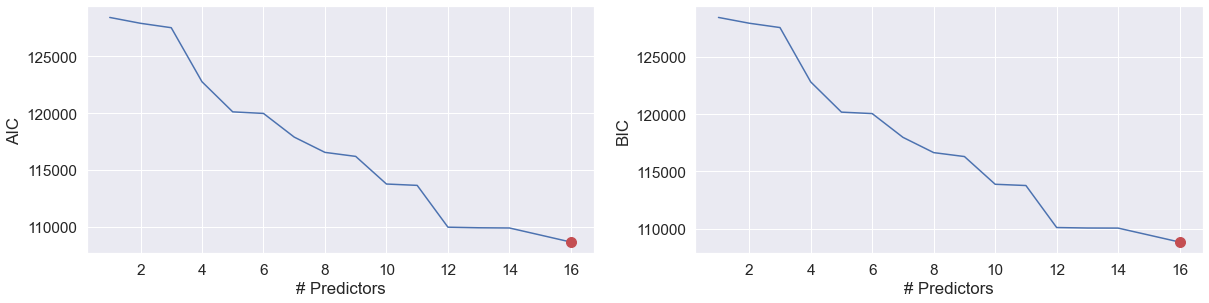

In [176]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

             feature        VIF
0              const  74.636861
1                BMI   1.108443
2            Smoking   1.067495
3    AlcoholDrinking   1.022739
4             Stroke   1.052646
5     PhysicalHealth   1.482866
6       MentalHealth   1.140953
7        DiffWalking   1.393625
8                Sex   1.030652
9               Race   1.022242
10          Diabetic   1.133459
11  PhysicalActivity   1.143438
12         GenHealth   1.571787
13         SleepTime   1.022765
14            Asthma   1.037701
15     KidneyDisease   1.056610
16        SkinCancer   1.029092


In [178]:
best_fwd_reg_model = models_best['model'][16]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               223856
Model:                          Logit   Df Residuals:                   223839
Method:                           MLE   Df Model:                           16
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.1709
Time:                        12:33:28   Log-Likelihood:                -54303.
converged:                       True   LL-Null:                       -65500.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3156      0.063    -20.868      0.000      -1.439      -1.192
Smoking              0.4271      0.017     25.376      0.000       0.394       0.460
BMI                 -0.0081      0.001     -6.336      0.000      -0.011      -0.006
AlcoholDrinking     -0.3828      0.038     -9.954      0.000      -0.458      -0.307
Stroke               1.2372      0.027     45.861      0.000       1.184       1.290
PhysicalHealth      -0.0005      0.001     -0.458      0.647      -0.002       0.001
MentalHealth        -0.0134      0.001    -12.842      0.000      -0.015      -0.011
DiffWalking          0.5240      0.021     24.464      0.000       0.482       0.566
Sex                 -0.6064      0.017    -35.822      0.000      -0.640      -0.573
Race                -0.1247      0.007    -18.193      0.000      -0.138      -0.111
Diabetic             0.7003      0.019     36.027      0.000       0.662       0.738
PhysicalActivity    -0.0626      0.019     -3.309      0.001      -0.100      -0.026
GenHealth           -0.5578      0.010    -56.441      0.000      -0.577      -0.538
SleepTime            0.0304      0.005      6.144      0.000       0.021       0.040
Asthma               0.0949      0.023      4.188      0.000       0.050       0.139
KidneyDisease        0.7141      0.029     24.408      0.000       0.657       0.771
SkinCancer           0.5843      0.023     25.876      0.000       0.540       0.629
====================================================================================
"""

# confusion matrix

In [179]:
pred = best_fwd_reg_model.predict(train)

In [180]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 91.6%
Precision = 59.2%
TPR or Recall = 5.7%
FNR = 94.3%
FPR = 0.4%
ROC-AUC = 80.1%


0         0.096537
1         0.085268
2         0.250502
3         0.078192
4         0.043289
            ...   
223851    0.549863
223852    0.026191
223853    0.028508
223854    0.365573
223855    0.072712
Length: 223856, dtype: float64

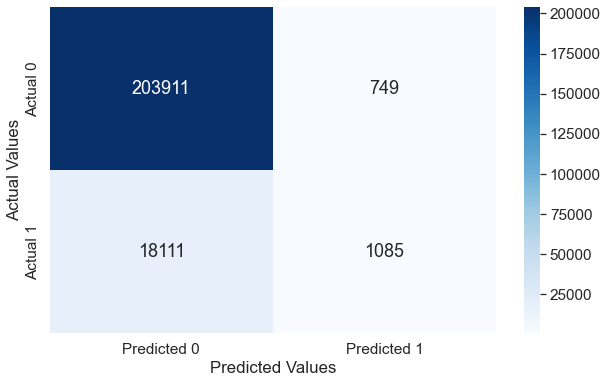

In [181]:
confusion_matrix_data(train,train.HeartDisease,best_fwd_reg_model,0.6)

Classification accuracy = 91.6%
Precision = 57.2%
TPR or Recall = 5.8%
FNR = 94.2%
FPR = 0.4%
ROC-AUC = 79.4%


223856    0.026396
223857    0.042120
223858    0.036368
223859    0.058610
223860    0.346156
            ...   
319790    0.338732
319791    0.042352
319792    0.026258
319793    0.031145
319794    0.023354
Length: 95939, dtype: float64

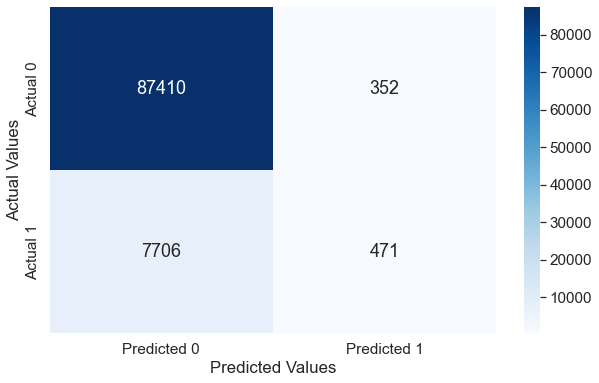

In [182]:
confusion_matrix_data(test,test.HeartDisease,best_fwd_reg_model,0.6)

In [183]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 91.6%
Precision = 57.2%
TPR or Recall = 5.8%
FNR = 94.2%
FPR = 0.4%
ROC-AUC = 79.4%


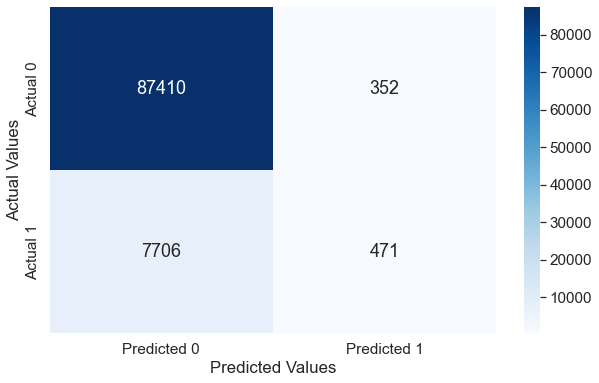

In [184]:
confusion_matrix_data(test,test.HeartDisease,best_fwd_reg_model,0.6)

In [185]:
#insigts: age, kidney disease, skin cancer, bmi, climbing stairs, stroke

#  base model

In [190]:
base_model = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = train).fit()

Optimization terminated successfully.
         Current function value: 0.227164
         Iterations 8


Classification accuracy = 91.6%
Precision = 59.3%
TPR or Recall = 6.0%
FNR = 94.0%
FPR = 0.4%
ROC-AUC = 84.2%


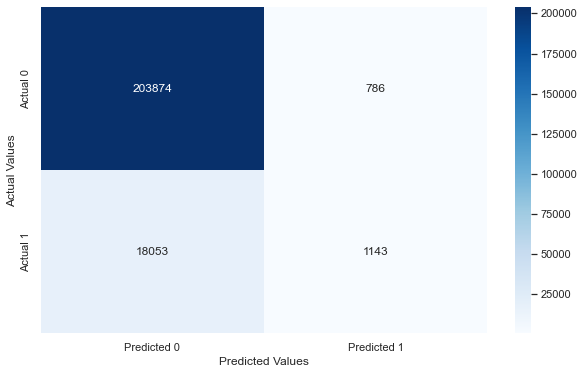

In [191]:
confusion_matrix_data(train,train.HeartDisease,base_model,0.6)

# interactions 

In [192]:
#model = sm.logit(formula = 'HeartDisease~', data = train).fit()
interact_model = sm.logit(formula = 'HeartDisease~Smoking*Asthma+AlcoholDrinking*MentalHealth+Sex+AgeCategory+Race+Diabetic*KidneyDisease+Stroke*DiffWalking*BMI*PhysicalHealth*PhysicalActivity*GenHealth+SleepTime+SkinCancer', data = train).fit()


Optimization terminated successfully.
         Current function value: 0.226677
         Iterations 8


Classification accuracy = 91.6%
Precision = 53.9%
TPR or Recall = 10.5%
FNR = 89.5%
FPR = 0.8%
ROC-AUC = 84.2%


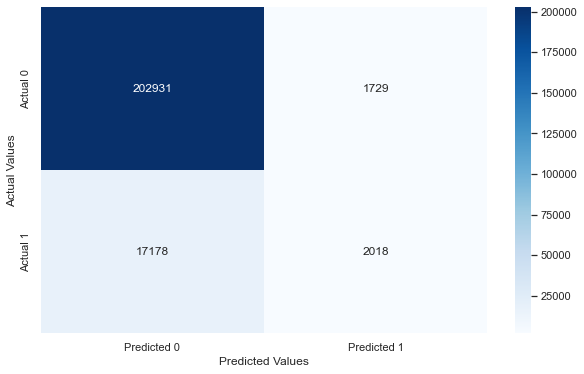

In [193]:
confusion_matrix_data(train,train.HeartDisease,interact_model,0.5)

In [194]:
#insigts: age, kidney disease, skin cancer, bmi, climbing stairs, stroke

In [195]:
interact_model2 = sm.logit(formula = 'HeartDisease~AgeCategory+Stroke+BMI+Smoking*Asthma+Diabetic*KidneyDisease', data = train).fit()

#HeartDisease~Smoking*Asthma+AlcoholDrinking*MentalHealth+Sex+AgeCategory+Race+Diabetic*KidneyDisease+Stroke*DiffWalking*BMI*PhysicalHealth*PhysicalActivity*GenHealth+SleepTime+SkinCancer


Optimization terminated successfully.
         Current function value: 0.241266
         Iterations 8


Classification accuracy = 91.5%
Precision = 55.9%
TPR or Recall = 3.0%
FNR = 97.0%
FPR = 0.2%
ROC-AUC = 80.8%


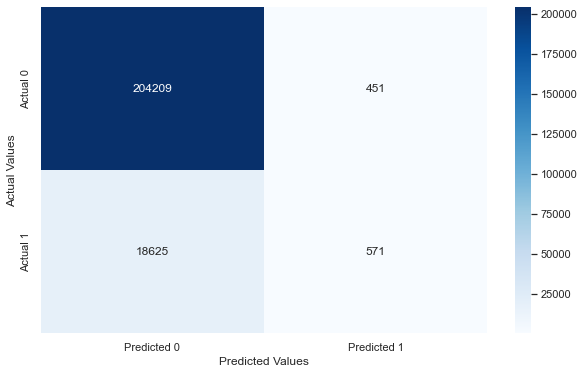

In [196]:
confusion_matrix_data(train,train.HeartDisease,interact_model2,0.6)

# transformations

In [197]:
#continuous variables: BMI, PhysicalHealth, MentalHealth AgeCategory, SleepTime

Optimization terminated successfully.
         Current function value: 0.291176
         Iterations 7
Classification accuracy = 91.4%
Precision = 0.0%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 55.9%


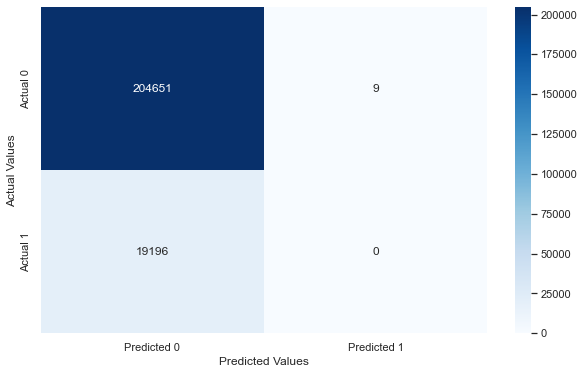

In [249]:
#bmi log -> higher acc
transform_model_bmi_log = sm.logit(formula = 'HeartDisease~np.log(BMI)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model_bmi_log,0.2)

Optimization terminated successfully.
         Current function value: 0.291079
         Iterations 7
Classification accuracy = 90.7%
Precision = 11.6%
TPR or Recall = 1.3%
FNR = 98.7%
FPR = 0.9%
ROC-AUC = 55.9%


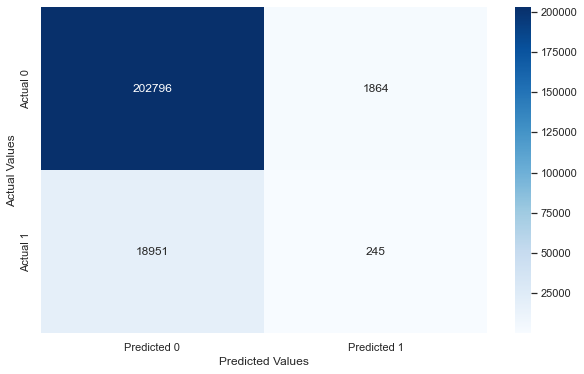

In [199]:
#bmi quad

transform_model = sm.logit(formula = 'HeartDisease~BMI+I(BMI**2)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~BMI+I(BMI**2)+I(BMI**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.12)

Optimization terminated successfully.
         Current function value: 0.291068
         Iterations 7
Classification accuracy = 85.6%
Precision = 10.9%
TPR or Recall = 9.6%
FNR = 90.4%
FPR = 7.3%
ROC-AUC = 55.9%


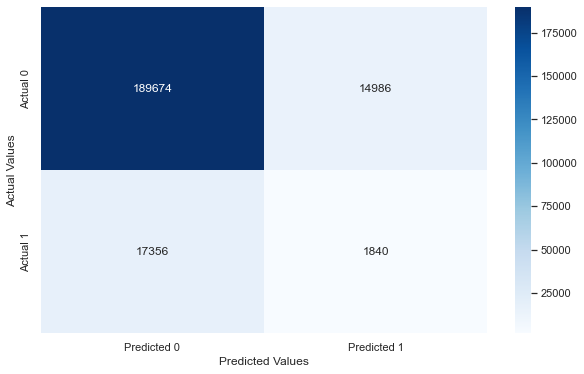

In [200]:
### bmi cubic

#transform_model = sm.logit(formula = 'HeartDisease~BMI+I(BMI**2)', data = train).fit()
transform_model = sm.logit(formula = 'HeartDisease~BMI+I(BMI**2)+I(BMI**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.11)

Optimization terminated successfully.
         Current function value: 0.292592
         Iterations 6
Classification accuracy = 91.1%
Precision = 13.0%
TPR or Recall = 0.6%
FNR = 99.4%
FPR = 0.4%
ROC-AUC = 48.8%


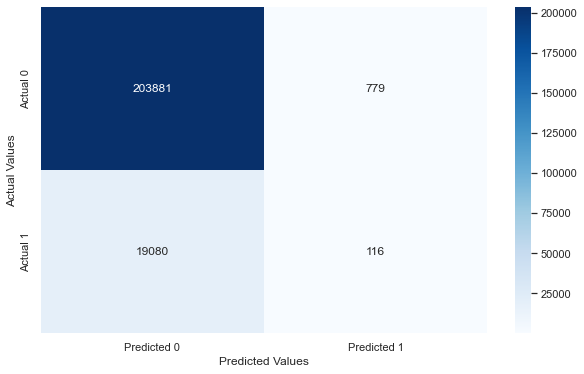

In [201]:
# SleepTime log

transform_model = sm.logit(formula = 'HeartDisease~np.log(SleepTime)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)+I(SleepTime**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.09)

Optimization terminated successfully.
         Current function value: 0.291742
         Iterations 6
Classification accuracy = 91.4%
Precision = 23.0%
TPR or Recall = 0.2%
FNR = 99.8%
FPR = 0.1%
ROC-AUC = 56.7%


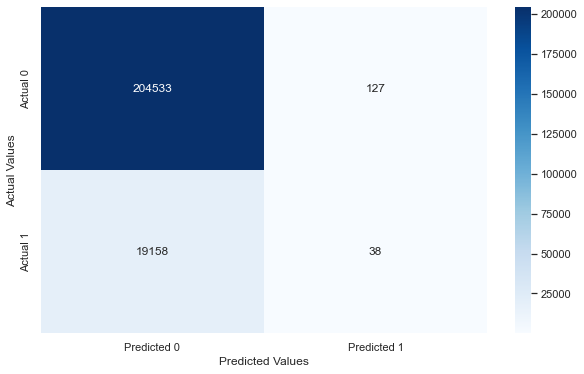

In [202]:
# SleepTime quad -> higher accuracy

#transform_model = sm.logit(formula = 'HeartDisease~np.log(SleepTime)', data = train).fit()
transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)+I(SleepTime**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.33)

Optimization terminated successfully.
         Current function value: 0.290871
         Iterations 7
Classification accuracy = 91.3%
Precision = 8.6%
TPR or Recall = 0.2%
FNR = 99.8%
FPR = 0.2%
ROC-AUC = 57.2%


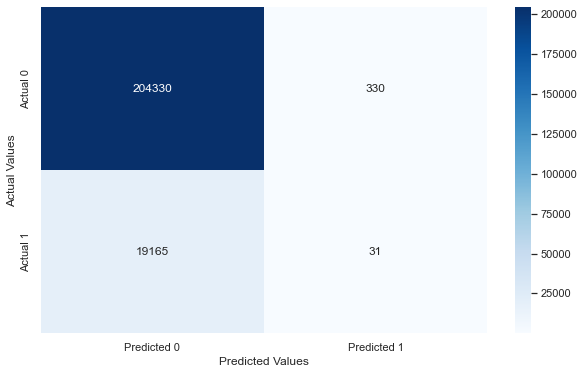

In [203]:
# SleepTime cubic

#transform_model = sm.logit(formula = 'HeartDisease~np.log(SleepTime)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)', data = train).fit()
transform_model = sm.logit(formula = 'HeartDisease~SleepTime+I(SleepTime**2)+I(SleepTime**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.33)

Optimization terminated successfully.
         Current function value: 0.281471
         Iterations 7
Classification accuracy = 87.2%
Precision = 22.9%
TPR or Recall = 20.9%
FNR = 79.1%
FPR = 6.6%
ROC-AUC = 61.6%


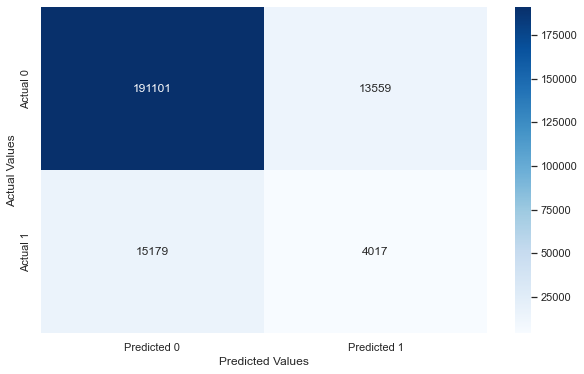

In [204]:
# PhysicalHealth quad

transform_model = sm.logit(formula = 'HeartDisease~PhysicalHealth+I(PhysicalHealth**2)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.2)

Optimization terminated successfully.
         Current function value: 0.281381
         Iterations 7
Classification accuracy = 87.9%
Precision = 23.5%
TPR or Recall = 18.1%
FNR = 81.9%
FPR = 5.5%
ROC-AUC = 61.6%


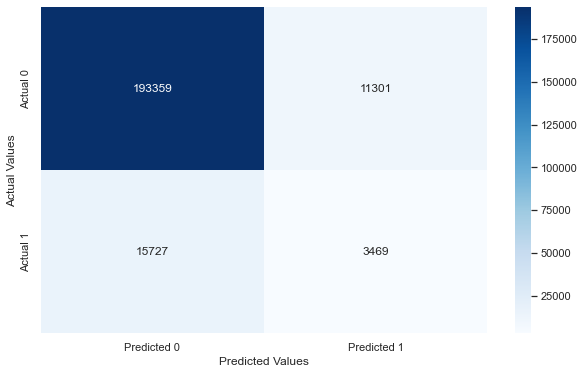

In [205]:
# PhysicalHealth cubic -> higher accuracy

#transform_model = sm.logit(formula = 'HeartDisease~PhysicalHealth+I(PhysicalHealth**2)', data = train).fit()
transform_model = sm.logit(formula = 'HeartDisease~PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.2)

Optimization terminated successfully.
         Current function value: 0.291637
         Iterations 6
Classification accuracy = 86.8%
Precision = 12.6%
TPR or Recall = 9.2%
FNR = 90.8%
FPR = 6.0%
ROC-AUC = 53.9%


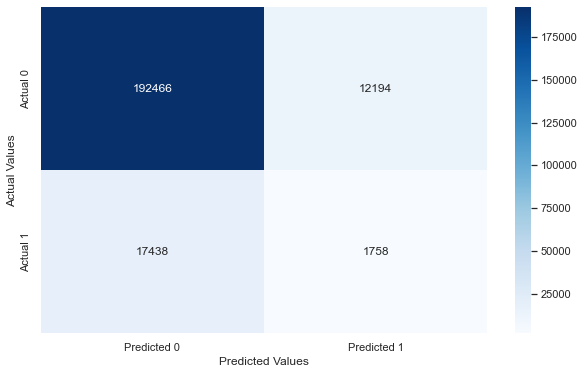

In [206]:
# MentalHealth quad -> higher accuracy

transform_model = sm.logit(formula = 'HeartDisease~MentalHealth+I(MentalHealth**2)', data = train).fit()
#transform_model = sm.logit(formula = 'HeartDisease~MentalHealth+I(MentalHealth**2)+I(MentalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.1)

Optimization terminated successfully.
         Current function value: 0.291384
         Iterations 7
Classification accuracy = 85.2%
Precision = 11.9%
TPR or Recall = 11.2%
FNR = 88.8%
FPR = 7.8%
ROC-AUC = 54.2%


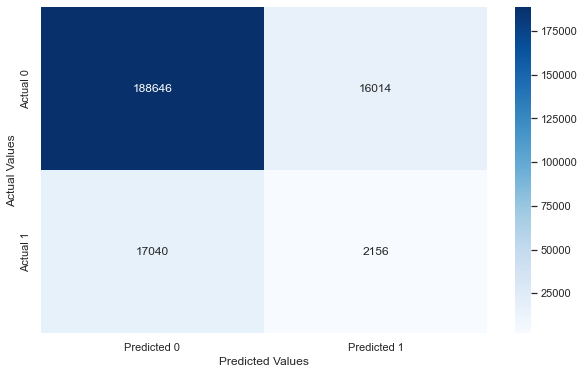

In [207]:
# MentalHealth cubic

#transform_model = sm.logit(formula = 'HeartDisease~MentalHealth+I(MentalHealth**2)', data = train).fit()
transform_model = sm.logit(formula = 'HeartDisease~MentalHealth+I(MentalHealth**2)+I(MentalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.1)

Optimization terminated successfully.
         Current function value: 0.279343
         Iterations 7
Classification accuracy = 91.4%
Precision = 26.9%
TPR or Recall = 0.2%
FNR = 99.8%
FPR = 0.0%
ROC-AUC = 65.9%


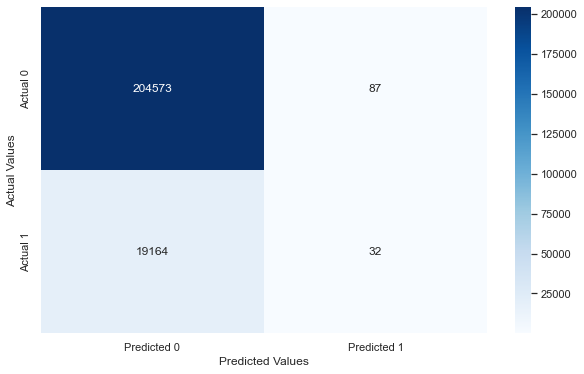

In [208]:
transform_model = sm.logit(formula = 'HeartDisease~np.log(BMI)+SleepTime+I(SleepTime**2)+MentalHealth+I(MentalHealth**2)+PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.4)

Optimization terminated successfully.
         Current function value: 0.279343
         Iterations 7
Classification accuracy = 91.4%
Precision = 26.9%
TPR or Recall = 0.2%
FNR = 99.8%
FPR = 0.0%
ROC-AUC = 65.9%


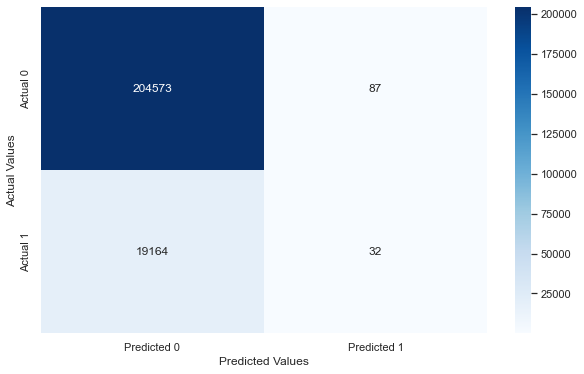

In [209]:
# just cont vars

transform_model = sm.logit(formula = 'HeartDisease~np.log(BMI)+SleepTime+I(SleepTime**2)+MentalHealth+I(MentalHealth**2)+PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.4)

Optimization terminated successfully.
         Current function value: 0.226924
         Iterations 8
Classification accuracy = 91.6%
Precision = 53.6%
TPR or Recall = 10.9%
FNR = 89.1%
FPR = 0.9%
ROC-AUC = 84.2%


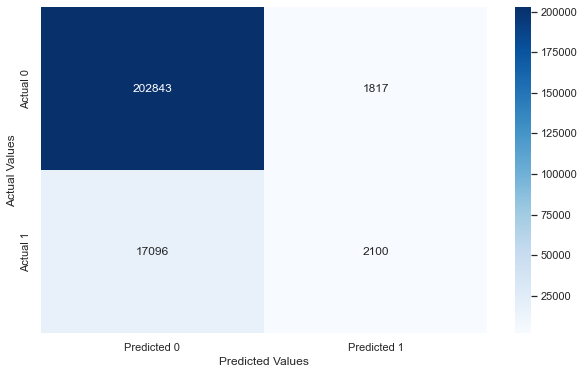

In [210]:
#transformed
transform_model = sm.logit(formula = 'HeartDisease~np.log(BMI)+SleepTime+I(SleepTime**2)+MentalHealth+I(MentalHealth**2)+PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)+Smoking+AlcoholDrinking+Stroke+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+Asthma+KidneyDisease+SkinCancer', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.5)

Optimization terminated successfully.
         Current function value: 0.226892
         Iterations 8
Classification accuracy = 91.6%
Precision = 59.6%
TPR or Recall = 5.9%
FNR = 94.1%
FPR = 0.4%
ROC-AUC = 84.2%


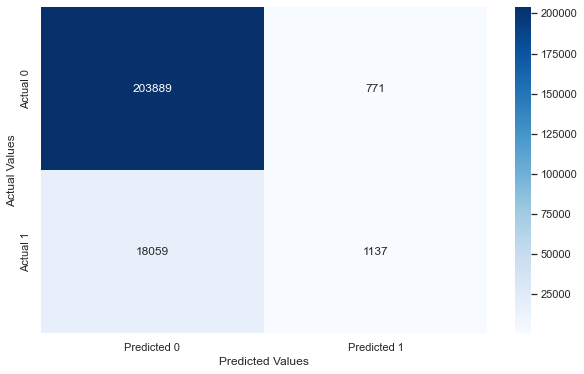

In [211]:
#transform + interact
transform_model = sm.logit(formula = 'HeartDisease~np.log(BMI)+SleepTime+I(SleepTime**2)+MentalHealth+I(MentalHealth**2)+PhysicalHealth+I(PhysicalHealth**2)+I(PhysicalHealth**3)+Smoking*Asthma+AlcoholDrinking+Stroke+DiffWalking+Sex+AgeCategory+Race+Diabetic*KidneyDisease+PhysicalActivity*GenHealth+SkinCancer', data = train).fit()
confusion_matrix_data(train,train.HeartDisease,transform_model,0.6)

# subsetting stroke & difficulty walking

## stroke  & difficulty walking = yes 

In [212]:
subset1 = data.loc[((train['Stroke'] == 1) & (data['DiffWalking'] == 1))]
subset1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
35,1,32.98,1,0,1,10.0,0.0,1,0,11,0,1,1,0,4.0,0,0,1
135,0,23.39,1,0,1,0.0,3.0,1,1,10,0,0,1,2,9.0,0,0,1
142,1,31.48,0,1,1,20.0,20.0,1,0,9,1,0,0,1,7.0,1,0,0
270,1,32.08,1,0,1,10.0,30.0,1,0,8,0,1,0,1,3.0,0,0,0
279,1,30.90,1,0,1,30.0,15.0,1,1,9,0,1,0,0,4.0,1,1,0


In [213]:
subset1.shape

(3715, 18)

In [250]:
model_subset1 = sm.logit(formula = 'HeartDisease~1', data = subset1).fit()
model_subset1.summary()

Optimization terminated successfully.
         Current function value: 0.686836
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                 5346
Model:                          Logit   Df Residuals:                     5345
Method:                           MLE   Df Model:                            0
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:               7.875e-11
Time:                        12:51:13   Log-Likelihood:                -3671.8
converged:                       True   LL-Null:                       -3671.8
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2254      0.028     -8.189      0.000      -0.279      -0.171
==============================================================================
"""

Classification accuracy = 55.7%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 50.0%


/var/folders/px/k1txdkt13v35xmbjymyfnzf40000gn/T/ipykernel_7669/2813583335.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


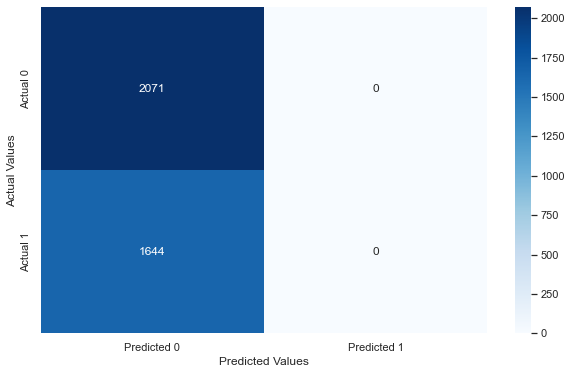

In [215]:
confusion_matrix_data(subset1,subset1.HeartDisease,model_subset1,0.6)

In [216]:
pred1 = model_subset1.predict(subset1)
pred1

35        0.44253
135       0.44253
142       0.44253
270       0.44253
279       0.44253
           ...   
223699    0.44253
223701    0.44253
223739    0.44253
223834    0.44253
223851    0.44253
Length: 3715, dtype: float64

In [217]:
pred1 = pred1.to_frame()
pred1['new'] = 0
pred1.drop(0, axis=1, inplace=True)
pred1.rename(columns={'new': 0}, inplace=True)
pred1

,0
35,0
135,0
142,0
270,0
279,0
...,...
223699,0
223701,0
223739,0
223834,0


##  stroke & difficulty walking = no

In [218]:
subset2 = data.loc[((train['Stroke'] != 1) & (data['DiffWalking'] != 1))]
subset2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
6,0,21.63,0,0,0,15.0,0.0,0,1,10,0,0,1,1,4.0,1,0,1
8,0,26.45,0,0,0,0.0,0.0,0,1,12,0,0,0,1,5.0,0,1,0


In [219]:
X_subset2 = subset2[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y_subset2 = subset2.HeartDisease

In [220]:
#X_sw_no_train, y_sw_no_train = oversampled.fit_resample(X_alc_no_train, y_alc_no_train)


In [221]:
#TP: 1391, FP:767, FN: 680, TN

Classification accuracy = 54.5%
Precision = 49.1%
TPR or Recall = 71.0%
FNR = 29.0%
FPR = 58.8%
ROC-AUC = 59.2%


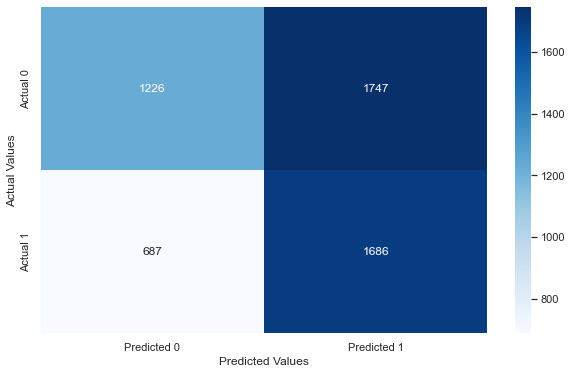

In [251]:
confusion_matrix_data(subset1,subset1.HeartDisease,model2,0.5)

In [ ]:
subset2 = train.loc[((train['Stroke'] != 1) & (train['DiffWalking'] != 1))]
#pred1 = model.predict(subset2)

In [ ]:
subset2.shape

In [ ]:
subset2 = train.loc[((train['Stroke'] != 1) | (train['DiffWalking'] != 1))]
model2 = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+PhysicalHealth+MentalHealth+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = subset2).fit()

confusion_matrix_data(subset2,subset2.HeartDisease,model2,0.6)


TP: 1391, FP:767, FN: 680, TN:877 -> subset1

TP: 176776, FP:10295, FN:509, TN:439 -> subset2

TP:178167, FP:11062, FN:,1189 TN: 1316 -> combined

class acc = TP+TN/(TP+TN+FP+FN)

179483/191734 = 0.936104186 ~ 93.6%

fnr = FN/(TP+FN)
1189/(178167+1189) = 0.006629 ~ 0.66 %

TN:178167, FN:11062, FP:1189, TP:1316

acc ~ 93.6

FNR: ~89.4

# smote

In [223]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = data.HeartDisease

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [225]:
test = pd.concat([X_test, y_test], axis=1)

In [226]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [227]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,4,4,0,1,4,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,10,0,1,1,1,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,5,0,0,1,4,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,10,0,1,1,2,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,0,4,0,0,3,8.0,0,0,0,0


In [228]:
#subset1 = train_smote.loc[((train_smote['Stroke'] == 1) & (train_smote['DiffWalking'] == 1))]
#subset1.head()

Optimization terminated successfully.
         Current function value: 0.589677
         Iterations 5
Classification accuracy = 44.4%
Precision = 44.4%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 50.0%


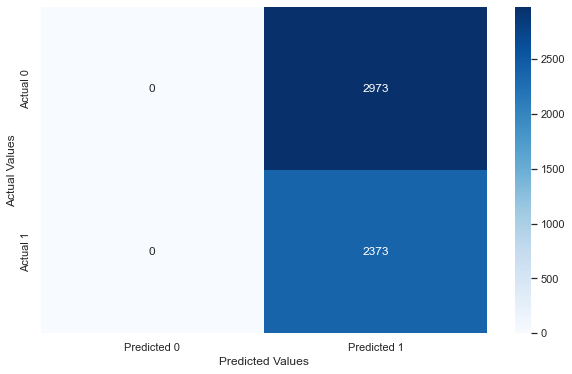

In [229]:
subset_smote1 = train_smote.loc[((train_smote['Stroke'] == 1) & (train_smote['DiffWalking'] == 1))]
subset1 = data.loc[((data['Stroke'] == 1) & (data['DiffWalking'] == 1))]
model1 = sm.logit(formula = 'HeartDisease~1', data = subset_smote1).fit()
confusion_matrix_data(subset1,subset1.HeartDisease,model1,0.6)

In [230]:
subset1.shape

(5346, 18)

In [231]:
subset2.shape

(188019, 18)

0, 0, 2973, 2373

Optimization terminated successfully.
         Current function value: 0.449686
         Iterations 7
Classification accuracy = 81.6%
Precision = 22.7%
TPR or Recall = 54.2%
FNR = 45.8%
FPR = 16.0%
ROC-AUC = 78.9%


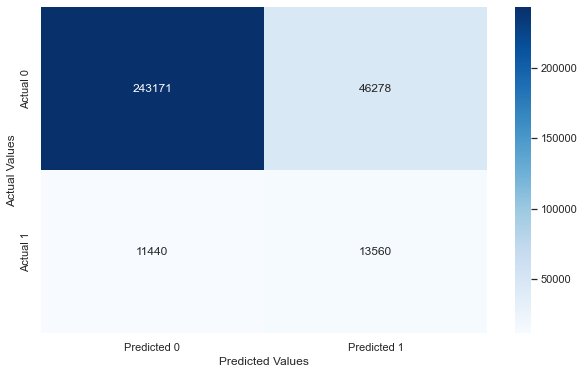

In [232]:
subset_smote2 = train_smote.loc[((train_smote['Stroke'] == 0) | (train_smote['DiffWalking'] == 0))]
subset2 = data.loc[((data['Stroke'] == 0) | (data['DiffWalking'] == 0))]
model2 = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+PhysicalHealth+MentalHealth+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = subset_smote2).fit()
confusion_matrix_data(subset2,subset2.HeartDisease,model2,0.6)

TN:154043, FN:45421, FP:25315, TP:105518

class acc = TP+TN/(TP+TN+FP+FN)

259561/330297 = 78.6~

fnr = FN/(TP+FN) ~ 41.8

1189/(178167+1189) = 0.006629 ~ 0.66 %

# smote part2 (w categorical vals)

In [233]:
heart_dataset = pd.read_csv('heart_2020_cleaned.csv')

In [234]:
heart_dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [235]:
df = heart_dataset.copy()

In [236]:
def reformat(data):
    replacement_values = {"Yes": 1, "No": 0, "Yes (during pregnancy)": 1, "No, borderline diabetes": 0, "Male": 0, "Female": 1}
    replacement_age = {"18-24": 0, "25-29": 1, "30-34": 2, "35-39": 3, "40-44": 4, "45-49": 5, "50-54": 6, "55-59": 7, "60-64": 8, "65-69": 9, "70-74": 10, "75-79": 11, "80 or older": 12}
    replacement_race = {"White": 0, "Black": 1, "Asian": 2, "American Indian/Alaskan Native": 3, "Hispanic": 4, "Other": 5}
    replacement_genhealth = {"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4}
    #replacement_bmi_cut = {'(11.937, 19.55]': 0, '(19.55, 27.08]': 1, '(27.08, 34.61]': 2, '(34.61, 42.14]': 3, '(42.14, 49.67]': 4, '(49.67, 57.2]': 5, '(57.2, 64.73]': 6, '(64.73, 72.26]': 7, '(72.26, 79.79]': 8, '(79.79, 87.32]': 9, '(87.32, 94.85]': 10}
    data.replace(replacement_values, inplace = True)
    data.replace(replacement_age, inplace = True)
    data.replace(replacement_race, inplace = True)
    data.replace(replacement_genhealth, inplace = True)
    #data.replace(replacement_bmi_cut, inplace = True)
reformat(df)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


In [237]:
X = df[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = df.HeartDisease

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [239]:
test = pd.concat([X_test, y_test], axis=1)

In [240]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [241]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

In [242]:
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,4,4,0,1,4,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,10,0,1,1,1,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,5,0,0,1,4,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,10,0,1,1,2,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,0,4,0,0,3,8.0,0,0,0,0


In [243]:
# Reformating Data back to Categorical

In [244]:
def reverse_reformat(data):
    #replacement_values = {"Yes": 1, "No": 0, "Yes (during pregnancy)": 1, "No, borderline diabetes": 0, "Male": 0, "Female": 1}
    replacement_age = {0 : "18-24", 1 : "25-29", 2 : "30-34", 3 : "35-39", 4 : "40-44", 5 : "45-49", 6 : "50-54", 7: "55-59", 8: "60-64", 9: "65-69", 10: "70-74", 11:  "75-79", 12: "80 or older"}
    replacement_race = { 0: "White", 1: "Black", 2 : "Asian", 3: "American Indian/Alaskan Native",  4: "Hispanic", 5: "Other"}
    replacement_genhealth = {0: "Poor", 1: "Fair", 2: "Good", 3: "Very good", 4: "Excellent"}
    replacement_bmi_cut = {0: '(11.937, 19.55]', 1: '(19.55, 27.08]', 2: '(27.08, 34.61]', 3: '(34.61, 42.14]', 4: '(42.14, 49.67]', 5: '(49.67, 57.2]', 6: '(57.2, 64.73]', 7: '(64.73, 72.26]', 8: '(72.26, 79.79]', 9: '(79.79, 87.32]', 10: '(87.32, 94.85]'}
    replacement_bmi_qcut = {0: '(12.019, 21.26]', 1: '(21.26, 23.01]', 2: '(23.01, 24.33]', 3: '(24.33, 25.61]', 4: '(25.61, 26.61]', 5: '(26.61, 27.89]', 6: '(27.89, 29.26]', 7: '(29.26, 31.0]', 8: '(31.0, 33.23]', 9: '(33.23, 36.92]', 10: '(36.92, 94.85]'}
    #data.replace(replacement_values, inplace = True)
    data['AgeCategory'].replace(replacement_age, inplace = True)
    data['Race'].replace(replacement_race, inplace = True)
    data['GenHealth'].replace(replacement_genhealth, inplace = True)
    #data['bmi_binned_cut'].replace(replacement_bmi_cut, inplace = True)
    #data['bmi_binned_qcut'].replace(replacement_bmi_qcut, inplace = True)
reverse_reformat(train_smote)
reverse_reformat(test)
reverse_reformat(df)
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,40-44,Hispanic,0,1,Excellent,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,70-74,White,1,1,Fair,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,45-49,White,0,1,Excellent,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,70-74,White,1,1,Good,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,18-24,Hispanic,0,0,Very good,8.0,0,0,0,0


Optimization terminated successfully.
         Current function value: 0.589677
         Iterations 5
Classification accuracy = 44.4%
Precision = 44.4%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 50.0%


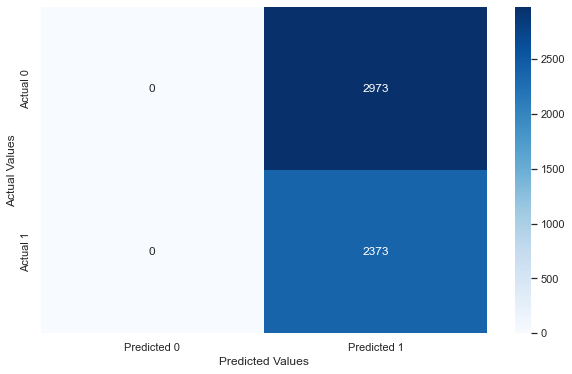

In [245]:
subset_smote1 = train_smote.loc[((train_smote['Stroke'] == 1) & (train_smote['DiffWalking'] == 1))]
subset1 = df.loc[((df['Stroke'] == 1) & (df['DiffWalking'] == 1))]
model1 = sm.logit(formula = 'HeartDisease~1', data = subset_smote1).fit()
confusion_matrix_data(subset1,subset1.HeartDisease,model1,0.6)

In [246]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                 7492
Model:                          Logit   Df Residuals:                     7491
Method:                           MLE   Df Model:                            0
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:               6.119e-11
Time:                        12:35:59   Log-Likelihood:                -4417.9
converged:                       True   LL-Null:                       -4417.9
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9616      0.026     37.229      0.000       0.911       1.012
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.442772
         Iterations 7
Classification accuracy = 81.7%
Precision = 22.5%
TPR or Recall = 53.1%
FNR = 46.9%
FPR = 15.8%
ROC-AUC = 78.5%


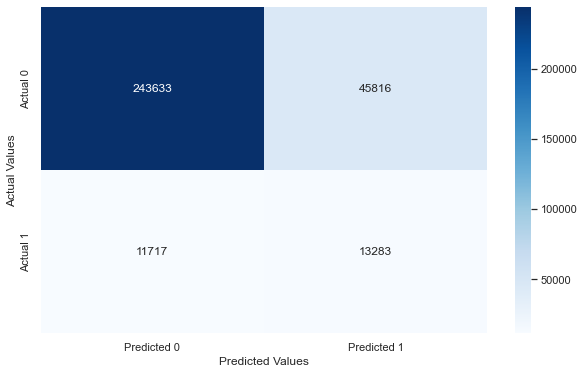

In [247]:
subset_smote2 = train_smote.loc[((train_smote['Stroke'] == 0) | (train_smote['DiffWalking'] == 0))]
subset2 = df.loc[((df['Stroke'] == 0) | (df['DiffWalking'] == 0))]
model2 = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = subset_smote2).fit()
confusion_matrix_data(subset2,subset2.HeartDisease,model2,0.6)

TN:243633, FN:11717, FP:48789, TP:15656

class acc = TP+TN/(TP+TN+FP+FN) 
259561/330297 = 81.0797~ 81.1

fnr = FN/(TP+FN) = 42.804 ~ 42.8

prec = TP/(TP+FP) ~ 24.293 ~24.3 

In [248]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               401898
Model:                          Logit   Df Residuals:                   401862
Method:                           MLE   Df Model:                           35
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3612
Time:                        12:36:33   Log-Likelihood:            -1.7795e+05
converged:                       True   LL-Null:                   -2.7856e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.9351      0.058    -50.708      0.000      -3.049      -2.822
AgeCategory[T.25-29]           0.3023      0.050      5.994      0.000       0.203       0.401
AgeCategory[T.30-34]           0.6012      0.047     12.867      0.000       0.510       0.693
AgeCategory[T.35-39]           0.8588      0.044     19.445      0.000       0.772       0.945
AgeCategory[T.40-44]           1.1929      0.042     28.263      0.000       1.110       1.276
AgeCategory[T.45-49]           1.5374      0.041     37.661      0.000       1.457       1.617
AgeCategory[T.50-54]           1.9834      0.039     50.396      0.000       1.906       2.061
AgeCategory[T.55-59]           2.3064      0.039     59.710      0.000       2.231       2.382
AgeCategory[T.60-64]           2.6246      0.038     68.685      0.000       2.550       2.700
AgeCategory[T.65-69]           2.9199      0.038     76.593      0.000       2.845       2.995
AgeCategory[T.70-74]           3.2669      0.038     85.345      0.000       3.192       3.342
AgeCategory[T.75-79]           3.5706      0.039     91.689      0.000       3.494       3.647
AgeCategory[T.80 or older]     3.6289      0.039     93.100      0.000       3.553       3.705
Race[T.Asian]                 -0.8642      0.046    -18.615      0.000      -0.955      -0.773
Race[T.Black]                 -1.3906      0.037    -37.164      0.000      -1.464      -1.317
Race[T.Hispanic]              -0.5094      0.035    -14.484      0.000      -0.578      -0.440
Race[T.Other]                 -0.9225      0.042    -21.950      0.000      -1.005      -0.840
Race[T.White]                 -0.1433      0.032     -4.532      0.000      -0.205      -0.081
GenHealth[T.Fair]              3.1335      0.020    156.260      0.000       3.094       3.173
GenHealth[T.Good]              2.1023      0.017    122.511      0.000       2.069       2.136
GenHealth[T.Poor]              4.1127      0.028    145.442      0.000       4.057       4.168
GenHealth[T.Very good]         1.1085      0.017     64.345      0.000       1.075       1.142
BMI                            0.0073      0.001     10.161      0.000       0.006       0.009
Smoking                       -0.1815      0.009    -21.048      0.000      -0.198      -0.165
AlcoholDrinking               -1.8877      0.031    -61.329      0.000      -1.948      -1.827
Stroke                         0.0534      0.027      2.002      0.045       0.001       0.106
PhysicalHealth                -0.0052      0.001     -8.470      0.000      -0.006      -0.004
MentalHealth                   0.0074      0.001     12.873      0.000       0.006       0.009
DiffWalking                   -0.4581      0.013    -34.784      0.000      -0.484      -0.432
Sex                           -1.3718      0.009   -152.900      0.000      -1.389      -1.354
Diabetic                      -0.2334      0.012    -19.918      0.000      -0.256      -0.210
PhysicalAct